In [2]:
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'

In [3]:
#import dask.dataframe as ddf
import dask.distributed as dds
from dask import bag as db
import time
import random
import numpy as np

# Setting up cluster

In [4]:
cluster = dds.LocalCluster()
client = dds.Client(cluster)
client

Client Scheduler: tcp://127.0.0.1:51001 Dashboard: http://127.0.0.1:8787,Cluster Workers: 4 Cores: 4 Memory: 8.49 GB


In [41]:
cluster.close()
client.close()

# Problem:

We want to apply a specific function to every element of a collection - easy parallelisation

In [8]:
data = list(np.random.randint(0,100,size=(2000)))

In [9]:
def funct(x):
    time.sleep(0.01)
    return x*2

# Sequential processing

In [10]:
%%time
res_seq=[]
for item, i in zip (data, range(len(data))):
    res_seq.append(funct(item))
    print('%d/%d'%(i,len(data)),end='\r')

Wall time: 31.3 s


# Distributed Parallel processing

Wrapping collection with Bag datatype & defining computation

In [11]:
bag = db.from_sequence(data)
res_distr_graph = bag.map(funct)

Visualising computation

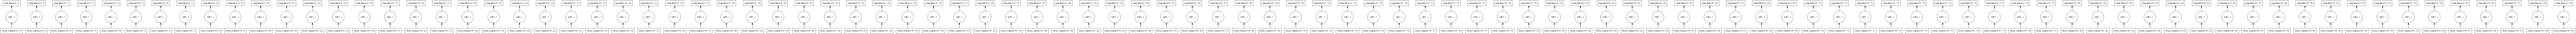

In [12]:
res_distr_graph.visualize()

Executing the defined computation

In [13]:
%%time 
res_distr = res_distr_graph.compute()

Wall time: 8.43 s


# More complex example

**Problem:**

In [ ]:
def mean2(a1, a2):
    return (a1+a2)/2

In [26]:
SIZE = 2000
bag = db.from_sequence(list(np.random.randint(0,100,size=(SIZE))))


res_filter = bag.filter(predicate=lambda x: funct(x)%3==2)
res_acc = res_filter.accumulate(mean2)

Too big to visualize:

res_acc.visualize()

**Too big to visualize:**

In [27]:
res_acc.visualize()

CalledProcessError: Command '['dot', '-Tpng']' returned non-zero exit status 3221225477.

**Let's make it smaller to visualise on sample**

In [28]:
SIZE = 20
bag = db.from_sequence(list(np.random.randint(0,100,size=(SIZE))))

res_filter = bag.filter(predicate=lambda x: funct(x)%3==2)
res_acc = res_filter.accumulate(mean2)
res_acc.visualize()

**Returning to original size and computing**

In [32]:
SIZE = 2000
bag = db.from_sequence(list(np.random.randint(0,100,size=(SIZE))))

res_filter = bag.filter(predicate=lambda x: funct(x)%3==2)
res_acc = res_filter.accumulate(mean2)

In [31]:
%%time
res_acc.compute()

Wall time: 10.9 s


[43,
 58.0,
 59.5,
 31.75,
 22.375,
 22.1875,
 29.59375,
 58.796875,
 73.3984375,
 79.19921875,
 85.099609375,
 83.5498046875,
 90.27490234375,
 93.637451171875,
 69.8187255859375,
 53.40936279296875,
 52.704681396484375,
 44.852340698242188,
 58.926170349121094,
 31.463085174560547,
 37.231542587280273,
 65.615771293640137,
 73.807885646820068,
 43.403942823410034,
 28.201971411705017,
 26.600985705852509,
 22.800492852926254,
 32.900246426463127,
 49.950123213231564,
 68.975061606615782,
 57.487530803307891,
 44.243765401653945,
 22.621882700826973,
 11.810941350413486,
 37.905470675206743,
 64.452735337603372,
 65.726367668801686,
 73.863183834400843,
 68.931591917200421,
 61.965795958600211,
 73.482897979300105,
 83.741448989650053,
 85.870724494825026,
 82.435362247412513,
 89.717681123706257,
 75.358840561853128,
 81.679420280926564,
 71.339710140463282,
 78.169855070231648,
 59.084927535115824,
 34.542463767557912,
 31.271231883778956,
 22.135615941889476,
 22.067807970944738,
 

**Hmmm... but what was the filtering result?**

In [34]:
%%time
res_filter.compute()

Wall time: 8.34 s


[49,
 52,
 13,
 61,
 91,
 94,
 1,
 58,
 10,
 31,
 34,
 61,
 61,
 40,
 22,
 37,
 52,
 1,
 52,
 7,
 16,
 16,
 43,
 88,
 28,
 64,
 13,
 34,
 13,
 70,
 43,
 7,
 76,
 7,
 67,
 94,
 64,
 49,
 37,
 52,
 13,
 67,
 16,
 82,
 28,
 25,
 10,
 64,
 13,
 85,
 43,
 43,
 4,
 40,
 25,
 10,
 25,
 52,
 10,
 85,
 82,
 37,
 91,
 76,
 46,
 67,
 46,
 28,
 16,
 85,
 88,
 55,
 61,
 67,
 79,
 1,
 94,
 94,
 85,
 22,
 85,
 94,
 79,
 70,
 58,
 58,
 97,
 4,
 46,
 67,
 91,
 88,
 85,
 25,
 28,
 49,
 64,
 52,
 88,
 97,
 61,
 10,
 46,
 76,
 40,
 61,
 1,
 16,
 40,
 94,
 1,
 97,
 91,
 49,
 64,
 82,
 70,
 76,
 70,
 52,
 16,
 7,
 97,
 97,
 19,
 4,
 7,
 67,
 64,
 73,
 76,
 55,
 22,
 4,
 94,
 4,
 46,
 10,
 82,
 19,
 43,
 22,
 25,
 4,
 52,
 61,
 22,
 34,
 94,
 91,
 10,
 85,
 43,
 52,
 16,
 55,
 79,
 64,
 4,
 22,
 10,
 10,
 16,
 73,
 91,
 40,
 64,
 61,
 46,
 10,
 1,
 61,
 40,
 34,
 49,
 19,
 37,
 76,
 1,
 25,
 4,
 10,
 13,
 31,
 79,
 94,
 73,
 13,
 55,
 13,
 19,
 40,
 25,
 49,
 67,
 55,
 43,
 64,
 22,
 82,
 4,
 16,
 37,
 7,
 3

**While computing res_acc, the intermediate result res_filter was forgotten and needed to be re-evaluated.**

We can force Dask cluster to memorize the intermediate results.

This is especially useful when we want to compute a few different results from this intermediate stage.

In [35]:
SIZE = 2000
bag = db.from_sequence(list(np.random.randint(0,100,size=(SIZE))))

#                                                          vvvvvvvvv
res_filter = bag.filter(predicate=lambda x: funct(x)%3==2).persist()
#                                                          ^^^^^^^^^
res_acc = res_filter.accumulate(mean2)

**Did it work..?**

In [39]:
%%time
res_acc.compute()

Wall time: 3.27 s


[64,
 58.0,
 61.0,
 52.0,
 74.5,
 57.25,
 42.625,
 36.8125,
 24.90625,
 23.453125,
 60.2265625,
 54.61328125,
 56.306640625,
 34.6533203125,
 35.82666015625,
 66.413330078125,
 60.7066650390625,
 66.85333251953125,
 57.926666259765625,
 69.963333129882813,
 62.481666564941406,
 48.240833282470703,
 54.620416641235352,
 74.310208320617676,
 37.655104160308838,
 20.827552080154419,
 58.913776040077209,
 55.456888020038605,
 28.228444010019302,
 49.114222005009651,
 29.557111002504826,
 52.778555501252413,
 68.889277750626206,
 52.944638875313103,
 64.472319437656552,
 70.236159718828276,
 50.618079859414138,
 28.809039929707069,
 40.404519964853534,
 53.702259982426767,
 27.351129991213384,
 50.175564995606692,
 40.587782497803346,
 32.793891248901673,
 24.396945624450836,
 27.698472812225418,
 42.849236406112709,
 44.424618203056355,
 31.712309101528177,
 52.356154550764089,
 49.178077275382044,
 68.589038637691019,
 82.794519318845516,
 44.897259659422758,
 37.948629829711379,
 46.4743

In [40]:
%%time
res_filter.compute()

Wall time: 93.8 ms


[64,
 52,
 64,
 43,
 97,
 40,
 28,
 31,
 13,
 22,
 97,
 49,
 58,
 13,
 37,
 97,
 55,
 73,
 49,
 82,
 55,
 34,
 61,
 94,
 1,
 4,
 97,
 52,
 1,
 70,
 10,
 76,
 85,
 37,
 76,
 76,
 31,
 7,
 52,
 67,
 1,
 73,
 31,
 25,
 16,
 31,
 58,
 46,
 19,
 73,
 46,
 88,
 97,
 7,
 31,
 55,
 1,
 37,
 55,
 13,
 64,
 28,
 10,
 52,
 70,
 97,
 19,
 97,
 85,
 1,
 58,
 67,
 94,
 79,
 28,
 46,
 37,
 25,
 22,
 73,
 25,
 55,
 13,
 52,
 49,
 1,
 97,
 43,
 97,
 91,
 97,
 82,
 67,
 1,
 70,
 52,
 64,
 52,
 16,
 61,
 85,
 79,
 10,
 82,
 7,
 37,
 31,
 28,
 85,
 97,
 70,
 1,
 97,
 52,
 46,
 85,
 4,
 79,
 16,
 85,
 61,
 67,
 19,
 28,
 16,
 37,
 94,
 40,
 4,
 1,
 4,
 43,
 49,
 67,
 91,
 37,
 85,
 52,
 97,
 43,
 91,
 70,
 16,
 82,
 1,
 73,
 25,
 19,
 19,
 7,
 4,
 91,
 88,
 1,
 76,
 58,
 46,
 7,
 91,
 46,
 28,
 58,
 70,
 82,
 91,
 94,
 19,
 4,
 76,
 97,
 40,
 31,
 58,
 55,
 34,
 19,
 10,
 7,
 31,
 1,
 91,
 40,
 28,
 43,
 58,
 19,
 13,
 85,
 76,
 49,
 43,
 34,
 37,
 70,
 70,
 70,
 4,
 97,
 91,
 1,
 49,
 67,
 34,
 97,
 10,
 

tornado.application - ERROR - Exception in callback functools.partial(<function wrap.<locals>.null_wrapper at 0x0000025959B09E18>, <tornado.concurrent.Future object at 0x0000025959561DD8>)
Traceback (most recent call last):
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\distributed\comm\core.py", line 185, in connect
    quiet_exceptions=EnvironmentError)
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\gen.py", line 1055, in run
    value = future.result()
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\concurrent.py", line 238, in result
    raise_exc_info(self._exc_info)
  File "<string>", line 4, in raise_exc_info
tornado.gen.TimeoutError: Timeout

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\ioloop.py", line 605, in _run_callback
    ret = callback()
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\stack_contex

**EUREKA!**